In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
import dask.dataframe as dd
import pingouin as pg
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
os.getcwd()
os.chdir('/Volumes/JosephBSR/Ben_BSR_all')

/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
TotalConcatenated = pd.read_csv('baseline_output.csv')

In [4]:
print(TotalConcatenated.shape)
print(TotalConcatenated.head())
print(TotalConcatenated.tail())

TotalConcatenated_strains = TotalConcatenated.groupby(["Strain", "worm"], as_index=False).mean()
TotalConcatenated_strains[['Genotype', 'Treatment']] = TotalConcatenated_strains['Strain'].str.split('_', 1, expand = True)
TotalConcatenated_strains = TotalConcatenated_strains.dropna()
TotalConcatenated_strains = TotalConcatenated_strains.Genotype.unique()

# print(TotalConcatenated_strains.head())
# print(TotalConcatenated_strains.tail())

print(TotalConcatenated_strains)

all_strains = pd.DataFrame(TotalConcatenated_strains, columns = ['Genotype'])
print(all_strains)

(1442158, 20)
   Unnamed: 0  time_bin  worm   time   speed      x      y  angularspeed  \
0           0       4.0   166  3.959  0.1877  24.45  24.12          9.70   
1           1       4.0   242  3.715  0.2145  31.42  36.22         24.75   
2           2       4.0   243  3.803  0.3030  31.27  37.90         17.75   
3           3       4.0   370  3.785  0.2279  21.31  28.89         32.56   
4           4       4.0   462  3.863  0.2375  21.34  34.94          1.20   

   pathlength   kink  bias  curve  dir     crab  length  midline   width  \
0     0.02400  49.30   1.0  33.80  0.0  0.00420  0.9326    1.055  0.2241   
1     0.06700  74.44   1.0  33.16  0.0  0.04553  0.8833    1.083  0.2542   
2     0.06300  48.25   1.0  31.10  0.0  0.03710  0.8670    1.075  0.2340   
3     0.05680  19.78   1.0  33.97  0.0  0.03903  0.8140    0.973  0.2203   
4     0.04565  44.22   1.0  38.34  0.0  0.00857  0.8057    1.011  0.1313   

   morphwidth     area      Strain  
0     0.16750  0.14870  N2_OffFood 

<ipython-input-4-c19cd162d20e>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  TotalConcatenated_strains[['Genotype', 'Treatment']] = TotalConcatenated_strains['Strain'].str.split('_', 1, expand = True)


In [5]:
start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
TotalConcatenated_chunked0 = TotalConcatenated[TotalConcatenated["time"] >= start]
TotalConcatenated_chunked = TotalConcatenated_chunked0[TotalConcatenated_chunked0["time"] <= point]

TotalConcatenated_mean = TotalConcatenated_chunked.groupby(["Strain", "worm"], as_index=False).mean()
TotalConcatenated_mean[['Genotype', 'Treatment']] = TotalConcatenated_mean['Strain'].str.split('_', 1, expand = True)
# print(TotalConcatenated_mean)
TotalConcatenated_worm_avg_speed = TotalConcatenated_mean[['Genotype', 'Treatment', 'Strain', 'speed']]
print(TotalConcatenated_worm_avg_speed)
TotalConcatenated_avg_speed = TotalConcatenated_worm_avg_speed.groupby(['Strain', 'Treatment', 'Genotype'], as_index = False).mean()
# TotalConcatenated_avg_speed = TotalConcatenated_worm_avg_speed.groupby(['Strain'], as_index = False).mean()
print(TotalConcatenated_avg_speed)
# print(TotalConcatenated_avg_speed['speed'][1])

            Genotype Treatment                Strain     speed
0                 N2   OffFood            N2_OffFood  0.185660
1                 N2   OffFood            N2_OffFood  0.164772
2                 N2   OffFood            N2_OffFood  0.166971
3                 N2   OffFood            N2_OffFood  0.194481
4                 N2   OffFood            N2_OffFood  0.204429
...              ...       ...                   ...       ...
11446  set-2(ok1484)    OnFood  set-2(ok1484)_OnFood  0.045343
11447  set-2(ok1484)    OnFood  set-2(ok1484)_OnFood  0.089745
11448  set-2(ok1484)    OnFood  set-2(ok1484)_OnFood  0.058583
11449  set-2(ok1484)    OnFood  set-2(ok1484)_OnFood  0.078368
11450  set-2(ok1484)    OnFood  set-2(ok1484)_OnFood  0.063003

[11451 rows x 4 columns]
                     Strain Treatment         Genotype     speed
0                N2_OffFood   OffFood               N2  0.184379
1                 N2_OnFood    OnFood               N2  0.099498
2   R07G3.8(tm5683)_Off

<ipython-input-5-0b17dd6cb0a3>:7: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  TotalConcatenated_mean[['Genotype', 'Treatment']] = TotalConcatenated_mean['Strain'].str.split('_', 1, expand = True)


In [6]:
N2_cat2 = ['N2_OffFood', 'N2_OnFood', 'cat-2(e1112)_OffFood', 'cat-2(e1112)_OnFood']
TotalN2cat2 = TotalConcatenated[TotalConcatenated['Strain'].isin(N2_cat2)]

print(TotalN2cat2.shape)
print(TotalN2cat2.head())

(757750, 20)
   Unnamed: 0  time_bin  worm   time   speed      x      y  angularspeed  \
0           0       4.0   166  3.959  0.1877  24.45  24.12          9.70   
1           1       4.0   242  3.715  0.2145  31.42  36.22         24.75   
2           2       4.0   243  3.803  0.3030  31.27  37.90         17.75   
3           3       4.0   370  3.785  0.2279  21.31  28.89         32.56   
4           4       4.0   462  3.863  0.2375  21.34  34.94          1.20   

   pathlength   kink  bias  curve  dir     crab  length  midline   width  \
0     0.02400  49.30   1.0  33.80  0.0  0.00420  0.9326    1.055  0.2241   
1     0.06700  74.44   1.0  33.16  0.0  0.04553  0.8833    1.083  0.2542   
2     0.06300  48.25   1.0  31.10  0.0  0.03710  0.8670    1.075  0.2340   
3     0.05680  19.78   1.0  33.97  0.0  0.03903  0.8140    0.973  0.2203   
4     0.04565  44.22   1.0  38.34  0.0  0.00857  0.8057    1.011  0.1313   

   morphwidth     area      Strain  
0     0.16750  0.14870  N2_OffFood  

# 8.2 Speed Trace Plot

<Figure size 432x288 with 0 Axes>

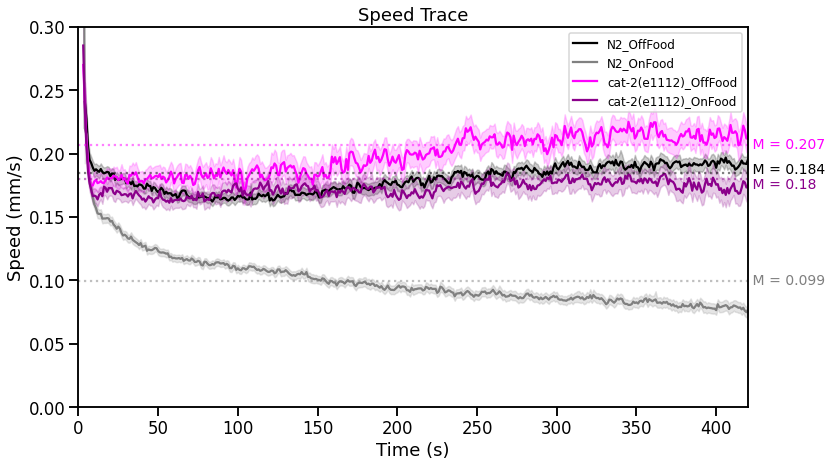

In [7]:
# Setting viewing range for your graph
top = 0.30
bottom = 0
left = 0
right = 420

sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x = "time_bin", 
             y = "speed", 
             # data = TotalConcatenated,
             data = TotalN2cat2,
             hue = 'Strain',
             palette = ['black',
                        'grey',
                        '#FF00FF',
                        '#8B008B',
                        # 'green',
                        # 'lightgreen',
                        # 'royalblue',
                        # 'lightblue',
#                         '#FFB5C5',
#                         '#CD6889'
                       ])
plt.xlabel("Time (s)")
plt.ylabel("Speed (mm/s)")
plt.title("Speed Trace")
plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
plt.axhline(y = TotalConcatenated_avg_speed['speed'][0], color = 'black', linestyle = ':', alpha = 0.5)
plt.axhline(y = TotalConcatenated_avg_speed['speed'][1], color = 'grey', linestyle = ':', alpha = 0.5)
plt.axhline(y = TotalConcatenated_avg_speed['speed'][4], color = '#FF00FF', linestyle = ':', alpha = 0.5)
plt.axhline(y = TotalConcatenated_avg_speed['speed'][5], color = '#8B008B', linestyle = ':', alpha = 0.5)
ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][0], 3)}",
            xy = (420, TotalConcatenated_avg_speed['speed'][0]),
            xytext = (420, TotalConcatenated_avg_speed['speed'][0]),
            color = 'black', size = 14)
ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][1], 3)}",
            xy = (420, TotalConcatenated_avg_speed['speed'][1] - 0.003),
            xytext = (420, TotalConcatenated_avg_speed['speed'][1] - 0.003),
            color = 'grey', size = 14)
ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][4], 3)}",
            xy = (420, TotalConcatenated_avg_speed['speed'][4] - 0.003),
            xytext = (420, TotalConcatenated_avg_speed['speed'][4] - 0.003),
            color = '#FF00FF', size = 14)
ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][5], 3)}",
            xy = (420, TotalConcatenated_avg_speed['speed'][5] - 0.005),
            xytext = (420, TotalConcatenated_avg_speed['speed'][5] - 0.007),
            color = '#8B008B', size = 14)
ax.legend(loc = 'upper right', fontsize = '12'
          # , labels = ['N2 (Off Food)', 'N2 (On Food)', 'CB1112 (Off Food)', 'CB1112 (On Food)']
         )
plt.savefig(f'Speed_Trace_{left}to{right}s.jpg', format='jpg', dpi=450)
plt.show()

# BSR bar plot (differences of differences)

Calculates worm speed average over designated time period

In [25]:
# print(TotalConcatenated.head(1))

start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range

# take data between specified time points (s)
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

# take mean of all measures for each worm
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index = False).mean()

# split `Strain` column into `Genotype` and `Treatment` columns
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)

# select only the specified columns from previous result (others not important for BSR score)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', 'speed']]

# take mean speed for each genotype and treatment (should result in 2 rows for each genotype - 1 for each condition)
avg_speed = worm_avg_speed.groupby(["Strain", 'Treatment', 'Genotype'], as_index = False).mean()
print(avg_speed)
# avg_speed.to_csv("avg_speed.csv")

# drop `Strain` and `Treatment` columns, group by `Genotype` (without making index based on `Genotype`)
# then, for each `Genotype`, subtract OnFood from OffFood speed
speed_diff = avg_speed.drop(columns=["Strain", "Treatment"])
speed_diff = speed_diff.groupby("Genotype", as_index = False).diff(periods = -1).dropna()

# rename difference column to 'speed_diff'
speed_diff.columns = ['speed_diff']

# print(speed_diff)

# calculate percent difference
avg_speed['speed_pct_diff'] = avg_speed.groupby('Genotype', as_index = False)['speed'].apply(lambda x: (x - x.shift(-1)) / x)
speed_pct_diff = avg_speed['speed_pct_diff'].dropna()
avg_speed = avg_speed.drop(columns = ['speed_pct_diff'])

# print(speed_pct_diff)


all_diff_measures = pd.concat([speed_diff, speed_pct_diff], axis=1)
# all_diff_measures = all_diff_measures.rename(columns={0: 'speed_pct_diff'})

# add `Genotype` labels back to speed difference measures so differences can be identified
all_diff_measures.insert(loc = 0, column = 'Genotype', value = avg_speed['Genotype'].unique())
all_diff_measures.reset_index(drop = True)

# # find N2 speed differences
# print(all_diff_measures.iloc[0, 1])
# print(all_diff_measures.iloc[0, 2])

# calculate BSR score using difference of differences
all_diff_measures['Score_diff_of_diff'] = all_diff_measures['speed_diff'] - all_diff_measures.iloc[0,1]
all_diff_measures['Score_diff_of_pct_diff'] = all_diff_measures['speed_pct_diff'] - all_diff_measures.iloc[0,2]

print(all_diff_measures)

speed_diff_sorted = all_diff_measures.sort_values(by = ["Score_diff_of_diff"]).drop(columns = ['speed_pct_diff',
                                                                                               'Score_diff_of_pct_diff'])
speed_diff_sorted = speed_diff_sorted.reset_index(drop = True)
print(speed_diff_sorted)

speed_pct_diff_sorted = all_diff_measures.sort_values(by = ["Score_diff_of_pct_diff"]).drop(columns = ['speed_diff',
                                                                                                       'Score_diff_of_diff'])
print(speed_pct_diff_sorted)

                     Strain Treatment         Genotype     speed
0                N2_OffFood   OffFood               N2  0.184379
1                 N2_OnFood    OnFood               N2  0.099498
2   R07G3.8(tm5683)_OffFood   OffFood  R07G3.8(tm5683)  0.162167
3    R07G3.8(tm5683)_OnFood    OnFood  R07G3.8(tm5683)  0.074619
4      cat-2(e1112)_OffFood   OffFood     cat-2(e1112)  0.206655
5       cat-2(e1112)_OnFood    OnFood     cat-2(e1112)  0.179703
6     gba-2(tm4623)_OffFood   OffFood    gba-2(tm4623)  0.165796
7      gba-2(tm4623)_OnFood    OnFood    gba-2(tm4623)  0.067302
8     gba-4(tm3314)_OffFood   OffFood    gba-4(tm3314)  0.134118
9      gba-4(tm3314)_OnFood    OnFood    gba-4(tm3314)  0.058023
10   hipr-1(ok1081)_OffFood   OffFood   hipr-1(ok1081)  0.183672
11    hipr-1(ok1081)_OnFood    OnFood   hipr-1(ok1081)  0.086518
12   igcm-2(ok1527)_OffFood   OffFood   igcm-2(ok1527)  0.169181
13    igcm-2(ok1527)_OnFood    OnFood   igcm-2(ok1527)  0.101381
14   lfe-2(tm14109)_OffFo

<ipython-input-25-32da12a68724>:14: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
<ipython-input-25-32da12a68724>:35: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  avg_speed['speed_pct_diff'] = avg_speed.groupby('Genotype', as_index = False)['speed'].apply(lambda x: (x - x.shift(-1)) / x)


In [21]:
avg_speed["new"] = range(1, len(avg_speed) + 1)
avg_speed.loc[avg_speed.index == 4, 'new'] = 0
avg_speed.loc[avg_speed.index == 4, 'new'] = 0
print(avg_speed)
# avg_speed.sort_values("new").drop('new', axis=1)

                     Strain Treatment         Genotype     speed  new
0                N2_OffFood   OffFood               N2  0.184379    1
1                 N2_OnFood    OnFood               N2  0.099498    2
2   R07G3.8(tm5683)_OffFood   OffFood  R07G3.8(tm5683)  0.162167    3
3    R07G3.8(tm5683)_OnFood    OnFood  R07G3.8(tm5683)  0.074619    4
4      cat-2(e1112)_OffFood   OffFood     cat-2(e1112)  0.206655    0
5       cat-2(e1112)_OnFood    OnFood     cat-2(e1112)  0.179703    6
6     gba-2(tm4623)_OffFood   OffFood    gba-2(tm4623)  0.165796    7
7      gba-2(tm4623)_OnFood    OnFood    gba-2(tm4623)  0.067302    8
8     gba-4(tm3314)_OffFood   OffFood    gba-4(tm3314)  0.134118    9
9      gba-4(tm3314)_OnFood    OnFood    gba-4(tm3314)  0.058023   10
10   hipr-1(ok1081)_OffFood   OffFood   hipr-1(ok1081)  0.183672   11
11    hipr-1(ok1081)_OnFood    OnFood   hipr-1(ok1081)  0.086518   12
12   igcm-2(ok1527)_OffFood   OffFood   igcm-2(ok1527)  0.169181   13
13    igcm-2(ok1527)

## Making the bar plot

<Figure size 432x288 with 0 Axes>

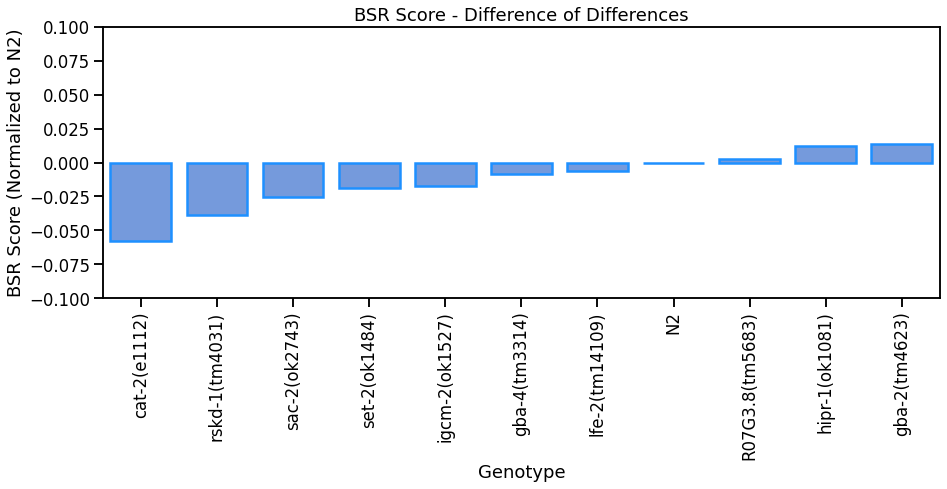

In [33]:
Title = "BSR Score - Difference of Differences" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'Genotype', 
             y = 'Score_diff_of_diff', 
             data = speed_diff_sorted, #<--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation=90)
plt.ylabel("BSR Score (Normalized to N2)")
plt.ylim(top = 0.1)
plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.jpg', format='jpg', dpi=450, bbox_inches = 'tight')
plt.show()

<Figure size 432x288 with 0 Axes>

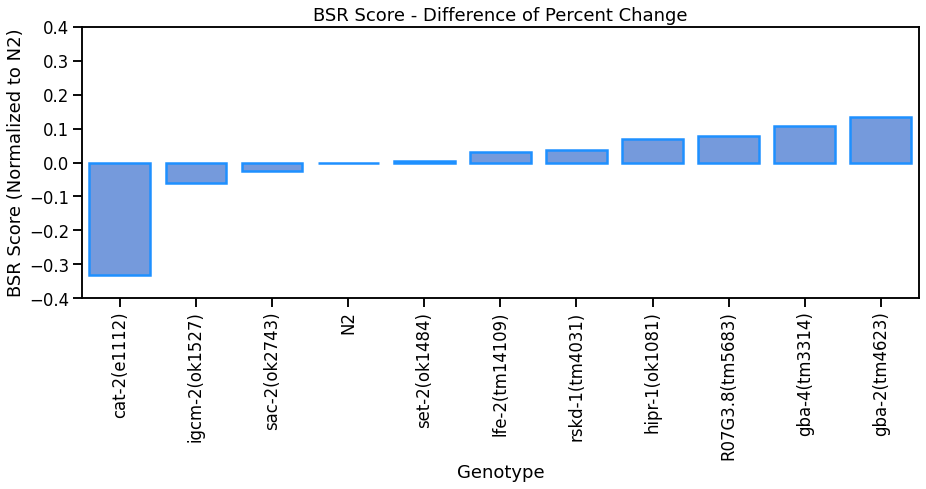

In [35]:
Title = "BSR Score - Difference of Percent Change" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'Genotype', 
             y = 'Score_diff_of_pct_diff', 
             data = speed_pct_diff_sorted, #<--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation=90)
plt.ylabel("BSR Score (Normalized to N2)")
plt.ylim(top = 0.4)
plt.ylim(bottom = -0.4)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.jpg', format='jpg', dpi=450, bbox_inches = 'tight')
plt.show()

# Generic differences of differences script

<ipython-input-12-fdc925b3dbef>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


           Genotype     curve     Score
4      cat-2(e1112)  2.129384 -2.248911
20    set-2(ok1484)  2.676155 -1.702140
18    sac-2(ok2743)  3.418020 -0.960274
2   R07G3.8(tm5683)  3.508874 -0.869421
0                N2  4.378295  0.000000
6     gba-2(tm4623)  4.545092  0.166797
8     gba-4(tm3314)  4.581170  0.202876
12   igcm-2(ok1527)  5.269670  0.891375
14   lfe-2(tm14109)  5.955073  1.576778
10   hipr-1(ok1081)  6.148143  1.769848
16   rskd-1(tm4031)  7.426997  3.048703
                     Strain Treatment         Genotype      curve  new
0                N2_OffFood   OffFood               N2  34.822610    1
1                 N2_OnFood    OnFood               N2  30.444315    2
2   R07G3.8(tm5683)_OffFood   OffFood  R07G3.8(tm5683)  30.257232    3
3    R07G3.8(tm5683)_OnFood    OnFood  R07G3.8(tm5683)  26.748358    4
4      cat-2(e1112)_OffFood   OffFood     cat-2(e1112)  35.184306    0
5       cat-2(e1112)_OnFood    OnFood     cat-2(e1112)  33.054922    6
6     gba-2(tm4623)_Off

<Figure size 432x288 with 0 Axes>

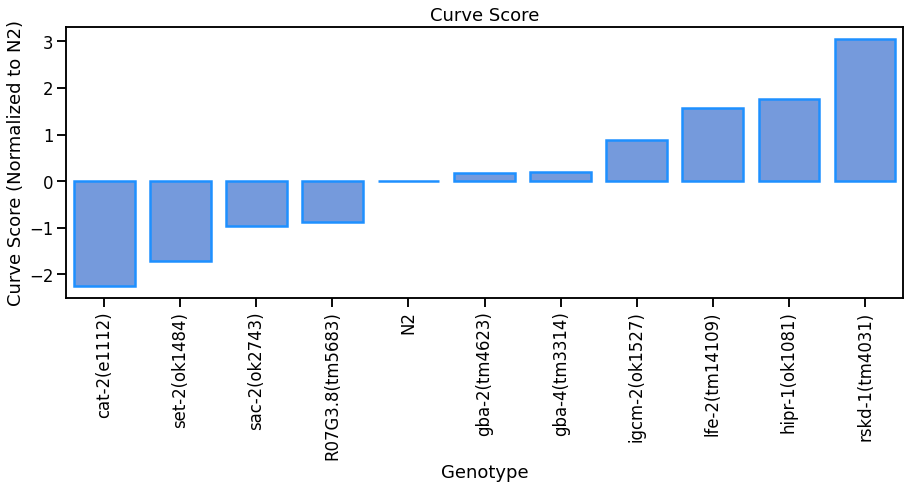

In [12]:
parameter = 'curve'

start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
worm_avg_parameter = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', parameter]]
avg_parameter = worm_avg_parameter.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
# print(avg_parameter)

# avg_parameter.to_csv("avg_parameter.csv")

parameter_diff = avg_parameter.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
parameter_diff.insert(loc=0, column='Genotype', value = avg_parameter['Genotype'].unique())
parameter_diff.reset_index(drop=True)
# print(parameter_diff)
# print(parameter_diff.iloc[0,1])
parameter_diff['Score'] = parameter_diff[parameter] - parameter_diff.iloc[0,1]
parameter_diff = parameter_diff.sort_values(by = ["Score"])
print(parameter_diff)

#################

# print(parameter_diff.iloc[0,1])

#################

avg_parameter["new"] = range(1,len(avg_parameter)+1)
avg_parameter.loc[avg_parameter.index==4, 'new'] = 0
avg_parameter.loc[avg_parameter.index==4, 'new'] = 0
print(avg_parameter)
# avg_parameter.sort_values("new").drop('new', axis=1)

#################

Title = f"{parameter.capitalize()} Score" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = 'Score', 
             data = parameter_diff, #<--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor="DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation=90)
plt.ylabel(f"{parameter.capitalize()} Score (Normalized to N2)")
# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.jpg', format='jpg', dpi=450, bbox_inches = 'tight')
plt.show()

In [13]:
behavioural_phenotypes = ['speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink']
# print(all_strains)

def differences_of_differences(start, point, df):
    chunkeddata0 = df[df["time"] >= start]
    chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
    chunkeddata_mean = chunkeddata.groupby(["Strain", "worm"], as_index=False).mean()
    chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
    all_scores = all_strains
    for parameter in behavioural_phenotypes:
        worm_avg_parameter = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', parameter]]
        avg_parameter = worm_avg_parameter.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
        # print(avg_parameter)

        # avg_parameter.to_csv("avg_parameter.csv")

        parameter_diff = avg_parameter.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
        parameter_diff.insert(loc=0, column='Genotype', value = avg_parameter['Genotype'].unique())
        parameter_diff.reset_index(drop=True)
        # print(parameter_diff)
        # print(parameter_diff.iloc[0,1])
        parameter_diff['Score'] = parameter_diff[parameter] - parameter_diff.iloc[0,1]
        # parameter_diff = parameter_diff.sort_values(by = ["Score"])
        parameter_diff = parameter_diff.drop(columns = [parameter])
        parameter_diff = parameter_diff.rename(columns = {'Score':parameter})
        parameter_diff = parameter_diff.reset_index(drop = True)
        # print(parameter_diff)
        all_scores = all_scores.join(parameter_diff.iloc[:,1])
    all_scores = all_scores.set_index("Genotype")
    return(all_scores)

differences_of_differences(100, 400, TotalConcatenated)

<ipython-input-13-bbbe05c132a1>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


,speed,angularspeed,bias,curve,crab,kink
Genotype,,,,,,
N2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R07G3.8(tm5683),0.002668,-3.329350,0.255768,-0.869421,-0.004915,-5.084235
cat-2(e1112),-0.057929,-5.076337,-0.033952,-2.248911,-0.008036,-3.657612
gba-2(tm4623),0.013613,-1.829588,0.162525,0.166797,-0.002430,-4.266177
gba-4(tm3314),-0.008786,-4.413686,0.292947,0.202876,-0.006536,-1.960113
hipr-1(ok1081),0.012273,2.839423,0.047216,1.769848,0.000962,-1.596524
igcm-2(ok1527),-0.017080,0.974300,-0.034130,0.891375,-0.000866,2.754734
lfe-2(tm14109),-0.006310,-3.984020,0.168133,1.576778,-0.005193,-1.069553
rskd-1(tm4031),-0.038760,-1.746752,0.208881,3.048703,-0.003528,-4.337853


In [14]:
PD_gene_behavioural_scores = differences_of_differences(100, 400, TotalConcatenated)
# PD_gene_behavioural_scores = PD_gene_behavioural_scores.dropna().sort_index().drop(index="N2")
PD_gene_behavioural_scores = PD_gene_behavioural_scores.dropna().sort_index()
PD_gene_behavioural_scores_normalize = (PD_gene_behavioural_scores - PD_gene_behavioural_scores.mean())/PD_gene_behavioural_scores.std()
PD_gene_behavioural_scores_normalize_2 = PD_gene_behavioural_scores_normalize - PD_gene_behavioural_scores_normalize[PD_gene_behavioural_scores_normalize.index == 'N2'].squeeze()
PD_gene_behavioural_scores_normalize_2 = PD_gene_behavioural_scores_normalize_2.drop(index = 'N2')
print(PD_gene_behavioural_scores_normalize)
print(PD_gene_behavioural_scores_normalize_2)

                    speed  angularspeed      bias     curve      crab  \
Genotype                                                                
N2               0.603563      0.741536 -0.478435 -0.107648  1.201162   
R07G3.8(tm5683)  0.726653     -0.549484  1.023017 -0.656533 -0.501745   
cat-2(e1112)    -2.068897     -1.226913 -0.677748 -1.527437 -1.583294   
gba-2(tm4623)    1.231570      0.032078  0.475647 -0.002345  0.359040   
gba-4(tm3314)    0.198243     -0.969957  1.241272  0.020432 -1.063445   
hipr-1(ok1081)   1.169771      1.842577 -0.201259  1.009697  1.534445   
igcm-2(ok1527)  -0.184402      1.119339 -0.678788  0.455098  0.901044   
lfe-2(tm14109)   0.312472     -0.803345  0.508569  0.887808 -0.598185   
rskd-1(tm4031)  -1.184545      0.064199  0.747771  1.817067 -0.021456   
sac-2(ok2743)   -0.551518      0.703321 -2.256394 -0.713891  0.589151   
set-2(ok1484)   -0.252909     -0.953350  0.296348 -1.182248 -0.816718   

                     kink  
Genotype              

<ipython-input-13-bbbe05c132a1>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


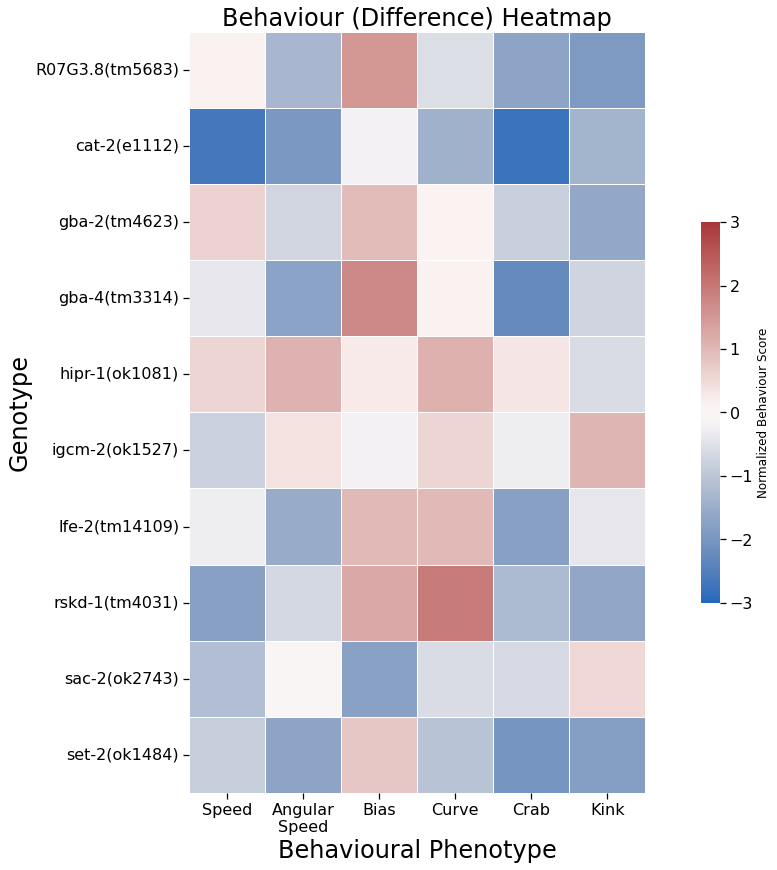

In [15]:
sns.set_context('notebook')
plt.figure(figsize=(20,14))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
ax = sns.heatmap(data = PD_gene_behavioural_scores_normalize_2, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Speed', 'Angular\nSpeed', 'Bias', 'Curve', 'Crab', 'Kink'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .5, "label": "Normalized Behaviour Score"})
ax.set_ylabel('Genotype', fontsize = 24)
ax.set_xlabel('Behavioural Phenotype', fontsize = 24)
ax.set_title('Behaviour (Difference) Heatmap', fontsize = 24)
plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.show()

# 8.3 Graphing Bar Graphs

# Speed Barplots Comparison

In [11]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----

start = 200
point = 400
var = "area"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)

Title = f"{var} - {start}-{point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata_mean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

<ipython-input-11-bfc333562ba3>:24: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)


ValueError: Columns must be same length as key

In [27]:
# Test Cell
# chunkeddata_mean

In [28]:
# Test Cell
# TotalConcatenated.describe()
# chunkeddata0
# chunkeddata

# Bias Barplots Comparison

ValueError: Could not interpret input 'Genotype'

<Figure size 432x288 with 0 Axes>

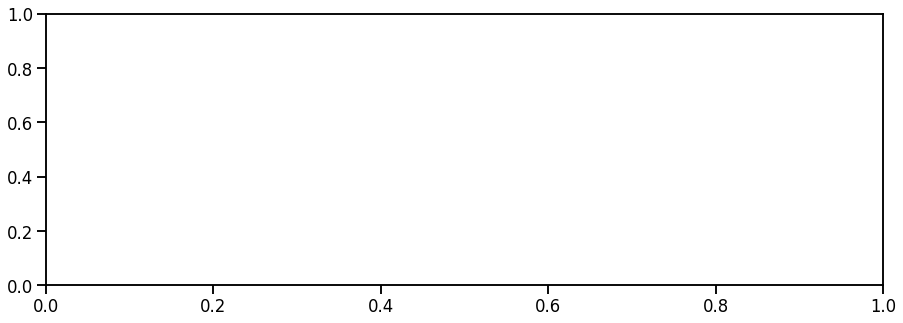

In [29]:
point = 420
var = "bias"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
             ci = None,
             palette = ['black',
                        'grey'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()